<a href="https://colab.research.google.com/github/dohyun93/hongong_mldl/blob/main/3_2_%EC%84%A0%ED%98%95_%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 이번 장은 k-최근접 이웃 회귀와 선형 회귀 알고리즘의 차이를 이해하고,
# scikit-learn을 활용해 여러가지 선형 회귀 모델을 만들어 본다.

# 먼저 농어 길이/무게에 대한 데이터를 준비한다.
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [3]:
# 훈련 세트와 검증 세트를 나눈다
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=3)

knr.fit(train_input, train_target)

print(knr.predict([[50]]))
# 실제 무게 1500g 과 꽤 많은 차이가 발생했다.

[1033.33333333]


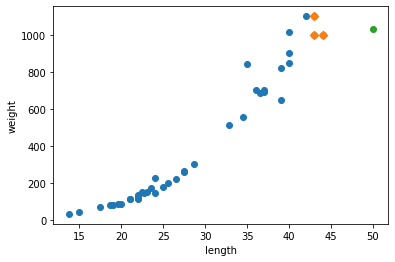

In [5]:
# 데이터를 시각화 해보자

import matplotlib.pyplot as plt

# [[50]]의 이웃들, 인덱스 확인
distances, indexes = knr.kneighbors([[50]])

plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
plt.scatter(50, 1033.33333)

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [10]:
# 50이 이 아니라 200 길이를 갖는 농어를 주면 어떻게될까?
print("length=50의 무게값 k-최근접 이웃 회귀 결과: ", knr.predict([[50]]))
print("length=200의 무게값 k-최근접 이웃 회귀 결과: ", knr.predict([[200]]))

length=50의 무게값 k-최근접 이웃 회귀 결과:  [1033.33333333]
length=200의 무게값 k-최근접 이웃 회귀 결과:  [1033.33333333]


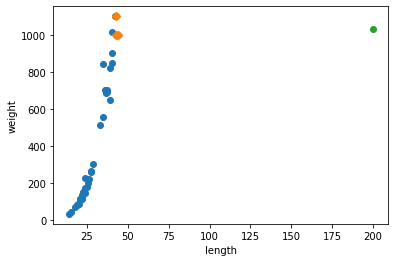

In [11]:
distances, indexes = knr.kneighbors([[200]])

plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
plt.scatter(200, knr.predict([[200]]))

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [12]:
# 위 시각화 데이터와 같이 예측을 위해 주어진 농어의 길이가 50cm이고 n_neighbors=3 를 감안하면
# 길이-무게가 비례적으로 증가하는 추이에도 불구하고 50, 100, 150 등 길이가 늘어나더라도 최근접 이웃 40~45 길이 사이의 농어들 무게를
# 평균내기 때문에, 주어진 데이터의 length 보다 큰 값들을 주더라도 제대로 무게를 예측할 수 없다.

# 즉, k-최근접 이웃 회귀 모델의 한계는 주어진 데이터의 범위를 벗어나는 데이터를 주었을 때
# 데이터의 상관관계에 따라 합리적으로 회귀결과를 얻을 수 없다는 것이다.

# 선형 회귀 (Linear regression)

> 선형 회귀는 널리 사용되는 대표적인 회귀 알고리즘이다. 

> 이름에서 알 수 있듯이, 한 특성에 대한 직선의 상관관계를 학습하는 알고리즘이다. 

> 아래와 같이 사이킷런에서 패키지를 가져올 수 있다.

```
from sklearn.linear_model import LinearRegression
```

In [14]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_input, train_target)

print("length=50 농어의 무게 \'선형\'회귀 결과: ", lr.predict([[50]]))
print("length=200 농어의 무게 \'선형\'회귀 결과: ", lr.predict([[200]]))

length=50 농어의 무게 '선형'회귀 결과:  [1241.83860323]
length=200 농어의 무게 '선형'회귀 결과:  [7094.41034777]


> 앞서 linear regression 은 선형 회귀, 즉 직선의 특성을 학습하는 알고리즘이라고 했다.

> 직선은 $y = a \times x + b$ 처럼 a, b라는 기울기와 절편이 존재한다.

> 이 값들은 ```lr``` 객체의 ```coef_``` 와 ```intercept_``` 속성에 저장되어 있다.

> 이 ```coef_```, ```intercept_``` 는 머신러닝 알고리즘이 찾은 값이라는 의미로, 모델 파라미터(model parameter)라고 부른다. 

**머신러닝 알고리즘이 \'학습\' 한다고 하는 것은 이러한 모델파라미터의 최적값을 찾는 것과 같다.**

**다만 모델기반, 사례기반 학습이 있는데, 앞서 살펴본 k-최근접 이웃은 이러한 모델 파라미터가 없어 '사례기반 학습'에 속하고, 선형회귀 알고리즘과 같이 모델파라미터가 있는 알고리즘은 '모델기반 학습'이라고 부른다.**

In [17]:
# 먼저 모델 파라미터를 출력해보자.
print('coef_ : ', lr.coef_)
print('intercept_ : ', lr.intercept_)

coef_ :  [39.01714496]
intercept_ :  -709.0186449535477


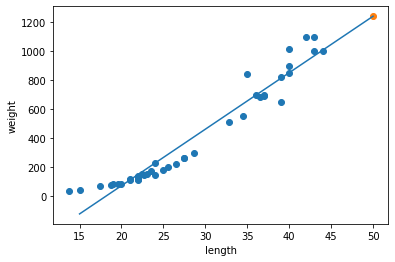

In [21]:
# 15~50 길이의 농어 무게를 학습한 모델파미터로 회귀한 직선과
# 학습데이터를 시각화 해보자.

# 1. 학습 데이터 시각화 (산점도)
plt.scatter(train_input, train_target)

# 2. 15~50길이 농어의 선형회귀 시각화
plt.plot([15, 50], [15*lr.coef_ + lr.intercept_, 50*lr.coef_ + lr.intercept_])

# 3. 50 길이의 농어 데이터 시각화
plt.scatter([[50]], lr.predict([[50]]))

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [23]:
# 결정계수 값을 확인해서 회귀 성능을 점검해보자.

print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.939846333997604
0.8247503123313558


In [ ]:
# 훈련세트보다 테스트세트의 성능이 안좋아서 과대적합이라고 볼 수 있을까?
# 훈련세트의 성능도 좋지 않으므로 과소적합 되었다고 볼 수 있다.

# 이 모델의 또 다른 문제는 위 그래프의 좌하단을 보면 길이가 더 줄경우 무게가 음수가 될 수 있다는 것이다.

# 실제 입력된 데이터들을 보면 length가 0에 가까워질 수록 곡선형태를 띄는걸 볼 수 있다.
# 즉, 우리는 직선이 아닌 곡선을 학습하는 알고리즘을 적용할 필요가 있다.

# 다항 회귀 (polynomial regression)

> $weight = a \times length + b$ 가 '길이'와 '무게'에 대한 직선의 모델 파라미터를 학습 했다

> 그러나 그래프 좌하단과 같이 직선의 모델은 실제 데이터의 무게와 다른 양상을 보인다.

> $weight = a \times length^2 + b \times length + c$ 로 곡선의 모델 파라미터를 학습해보자.

```2차 방정식이라고해서 비선형 회귀가 아니다. 길이의 제곱이나 길이나 둘다 '길이' 특성이므로 위 2차 방정식도 결국 무게와 길이의 '선형 관계'라고 표현할 수 있다.```

In [24]:
# 길이와 길이 제곱을 훈련세트에 추가해보자.
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

lr = LinearRegression()
# target은 column_stack 안해도 괜찮다.
# 결국 인풋의 shape만 바뀌고 그에대한 라벨은 동일하니까.
lr.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]]))

[1573.98423528]


In [27]:
# 학습된 2차원함수의 모델 파라미터를 확인해보자
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.0502107827827


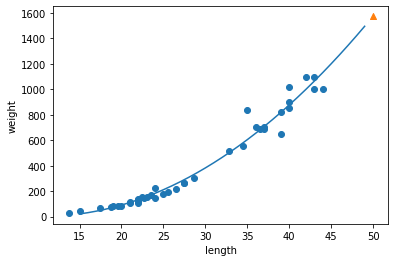

In [29]:
# 마지막으로 전체 시각화 해보자

point = np.arange(15, 50)

# 1. 훈련 세트 시각화
plt.scatter(train_input, train_target)

# 2. point와 학습된 모델파라미터 사용하여 시각화
plt.plot(point, 1.014332*point**2 - 21.5579 * point + 116.0502)

# 3. 50 cm 농어 무게 by 모델
plt.scatter([[50]], lr.predict([[50**2, 50]]), marker='^')

plt.xlabel('length')
plt.ylabel('weight')

plt.show()

In [30]:
# 마지막으로 결정계수 확인해보자!

print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122


In [31]:
# 훈련세트, 테스트세트 모두 성능이 훨씬 좋아졌다.
# 그러나 테스트 세트의 성능이 조금 더 좋은 걸 봐서, 아직 과소적합이 조금 보인다.

# 조금 더 복잡한 모델을 적용해볼 필요가 있을 것 같다는 생각이 든다.